-----------COMEÇANDO---------


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

          Média de Retorno  Porcentagem da Carteira  Porcentagem em 10%  \
BBDC4.SA          1.322583                     0.12                 0.1   
WEGE3.SA          1.441016                     0.12                 0.1   
HAPV3.SA         -0.030608                     0.04                 0.1   
PRIO3.SA          1.319363                     0.12                 0.1   
EQTL3.SA          1.193051                     0.04                 0.1   
ENEV3.SA          1.460966                     0.12                 0.1   
RADL3.SA          1.454218                     0.12                 0.1   
B3SA3.SA          1.377653                     0.12                 0.1   
ABEV3.SA          1.421571                     0.12                 0.1   
BBAS3.SA          1.304211                     0.08                 0.1   

          Resultado Carteira Otimizada  Resultado Carteira Não Otimizada  
BBDC4.SA                      0.158710                          0.132258  
WEGE3.SA                

<Figure size 1800x600 with 0 Axes>

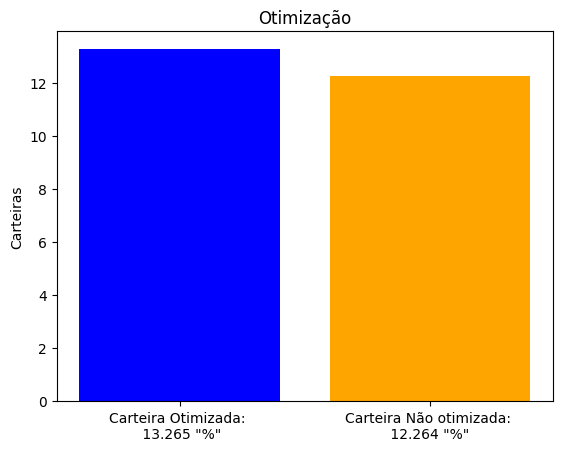

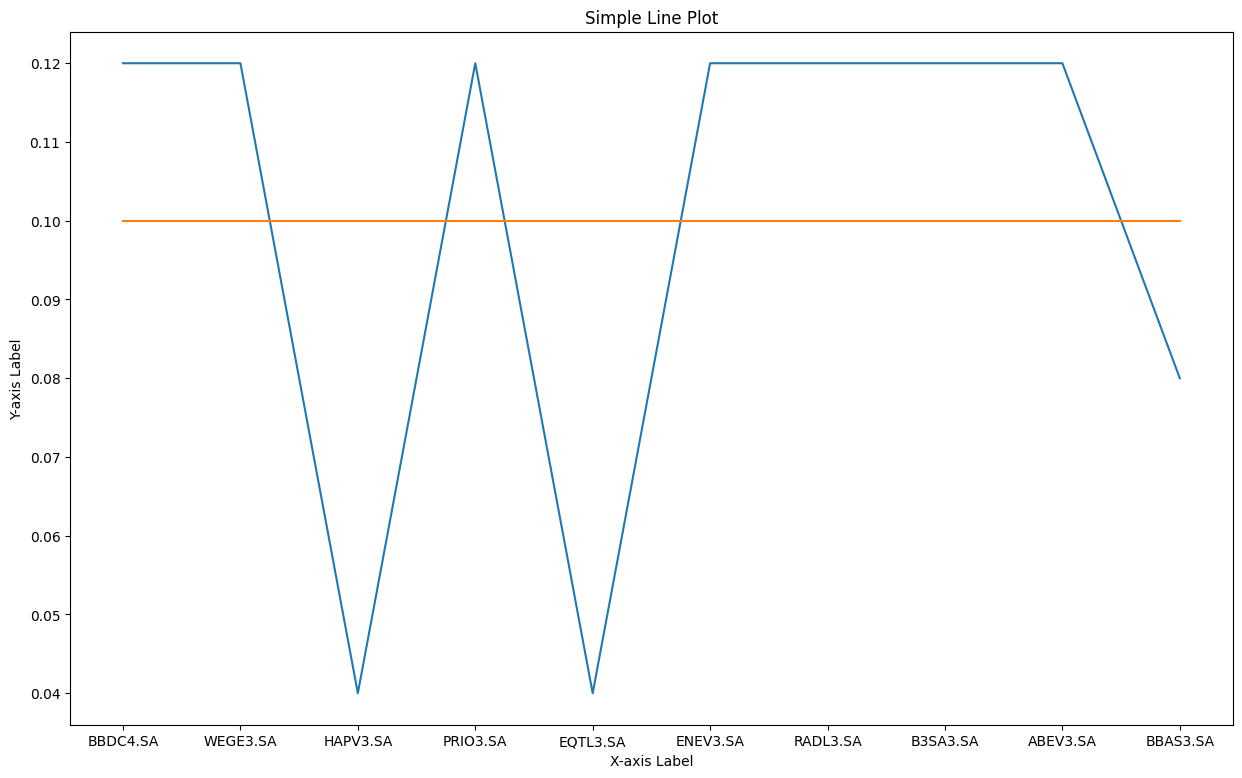

-------FIM----------


In [60]:
import pandas as pd
import numpy as np
import random
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.environ import SolverFactory
import yfinance as yf
import matplotlib.pyplot as plt



lista_ativos = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA', 'WEGE3.SA',
       'B3SA3.SA', 'BBAS3.SA', 'RENT3.SA', 'PRIO3.SA', 'SUZB3.SA', 'GGBR4.SA',
       'CSNA3.SA', 'GOAU4.SA', 'RADL3.SA', 'ENEV3.SA', 'EQTL3.SA', 'FLRY3.SA',
       'HAPV3.SA', 'MGLU3.SA', '^BVSP']

lista_ativos = random.sample(lista_ativos[0:-1],10)

print("-----------COMEÇANDO---------")

mydf = pd.DataFrame()
for ativo in lista_ativos:
    mydf[ativo] = yf.download(ativo, period="6mo")["Close"]

retornos = (mydf / mydf.shift(1))-1

retorno_media = retornos.mean()*127
retorno_media = retorno_media + 1

valor_total_investir = 50000
tamanho_carteira = 10
maximo_peso_carteira = 0.15


#MODELO
model = pyo.ConcreteModel()

#Definindo Variaveis
model.x = pyo.Var(range(tamanho_carteira), bounds=(0.04, None))
x=model.x

#Restrições
model.soma_peso_percent = pyo.Constraint(expr = sum(x[i] for i in range(int(tamanho_carteira))) == 1 )
model.soma_total_investido = pyo.Constraint(expr = sum(x[i] * 50000 for i in range(tamanho_carteira)) <= 50000)

model.maximo_peso_ativo = pyo.ConstraintList()
for i in range(tamanho_carteira):
    model.maximo_peso_ativo.add(expr = x[i] <= 0.12)

#Objetivo
model.obj = pyo.Objective(expr = sum(x[i] * retorno_media.iloc[i] for i in range(tamanho_carteira)), sense=pyo.maximize)

opt = SolverFactory('cplex', executable='C:\\CPLEX_Studio2211\\cplex\\bin\\x64_win64\\cplex.exe')
resultado = opt.solve(model)

df = pd.DataFrame(retorno_media, columns=["Média de Retorno"])
df['Porcentagem da Carteira'] = [pyo.value(x[i]) for i in range(tamanho_carteira)]
df['Porcentagem em 10%'] = 0.10


#imprimindo resultados

df['Resultado Carteira Otimizada'] = df['Média de Retorno'] * df['Porcentagem da Carteira']
df['Resultado Carteira Não Otimizada'] = df['Média de Retorno'] * df['Porcentagem em 10%']

print(df)



#### GRAFICCO BARRA
# print(df['Resultado Carteira Otimizada'].mean())
# print(df['Resultado Carteira Não Otimizada'].mean())

lista_resultados = [float(df['Resultado Carteira Otimizada'].mean())*100, float(df['Resultado Carteira Não Otimizada'].mean()*100)]

plt.figure(figsize=(18, 6)) # Sets the figure to be 10 inches wide and 6 inches tall

#grafico de barra
fig, ax = plt.subplots()

bar_labels = ['blue', 'orange']
ax.bar([f'Carteira Otimizada: \n {np.round(lista_resultados[0],3)} "%"', f'Carteira Não otimizada: \n {np.round(lista_resultados[1],3)} "%" '],lista_resultados, label=bar_labels, color=bar_labels)


ax.set_ylabel('Carteiras')
ax.set_title('Otimização')

plt.show()


### GRAFICO LINHA
plt.figure(figsize=(15,9))
# Plot the line
plt.plot(df['Porcentagem da Carteira'])
plt.plot(df['Porcentagem em 10%'])



# Add labels and a title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Simple Line Plot')

# Display the plot
plt.show()

print("-------FIM----------")
# model.pprint()